In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset

df=pd.read_csv("Mall_Customers.csv")

In [3]:
#viewing the dataset, first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking no of rows,columns
df.shape

(200, 5)

In [5]:
#describing the dataset

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#checking datatypes
df.dtypes

#gender is object type because it is either male or female

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#checking if our dataset has any null values
df.isnull().sum()
#checking columnwise

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.isnull() #checking each row separately

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
#dropping a column
#axis=1 because we are dropping a column,inplace=true- because we are making the changes in dataset itself
df.drop(["CustomerID"],axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


c:\users\v\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\v\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\v\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

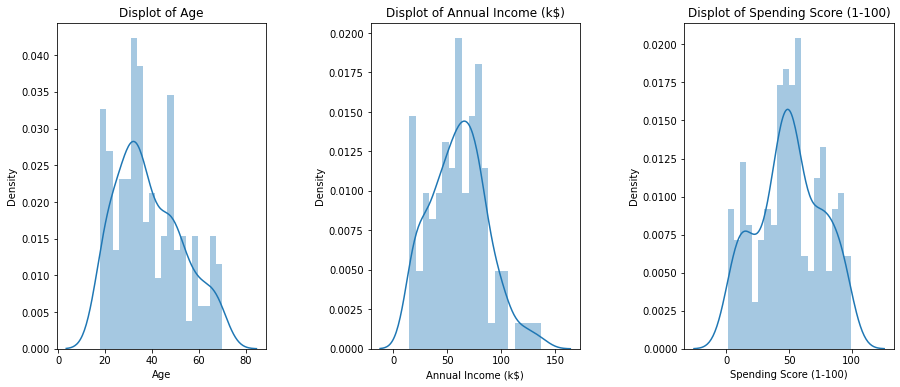

In [11]:
plt.figure(1,figsize=(15,6)) #15cm,6cm
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n) #this represents no of rows, columns and index
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins = 20)
    plt.title('Displot of {}'.format(x)) #giving our plots a title
    
plt.show()

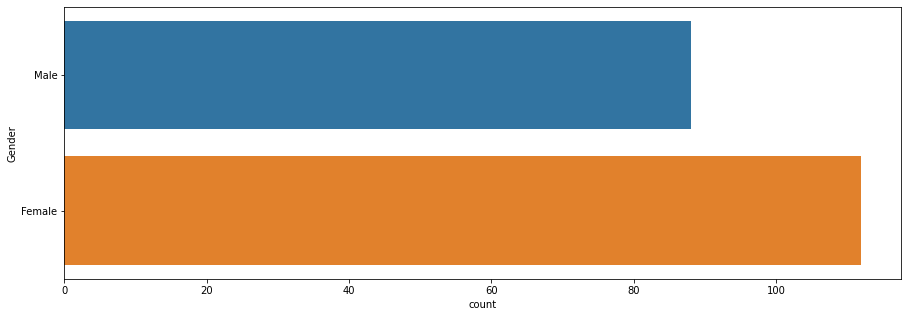

In [12]:
#countplot
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

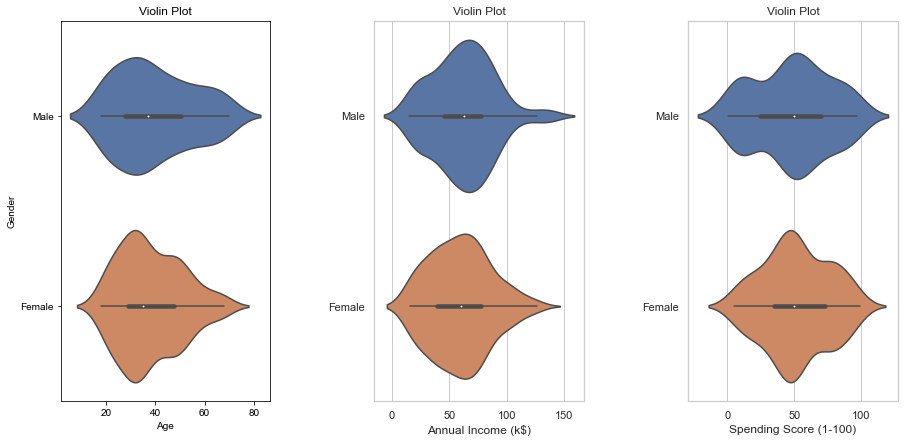

In [13]:
#violin distribution
#distributing on the basis of gender
plt.figure(1,figsize=(15,7)) #15cm,7cm
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n) #this represents no of rows, columns and index
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df) # here x represents the column names mentioned above and y axis is representing gender
    plt.ylabel('Gender' if n==1 else '') #labels the y axis of the current axis
    plt.title('Violin Plot') #giving our plots a title
    
plt.show()

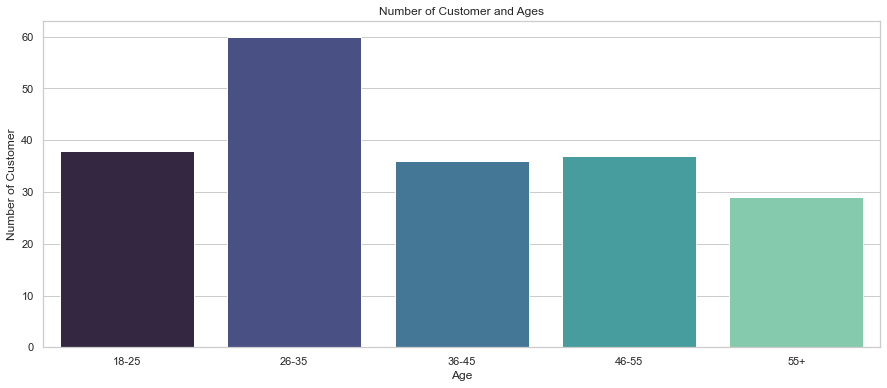

In [14]:
#dividing data into categories on the basis of there age, to check which age group has the highest number of customers 
#dividing age into different ranges

age_18_25 = df.Age[(df.Age >=18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <=55)]
age_55above = df.Age[(df.Age >=56)]

agex = ["18-25", "26-35" , "36-45" , "46-55" , "55+"] #representing x axis
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)] #representing y axis

#plotting a bar plot
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

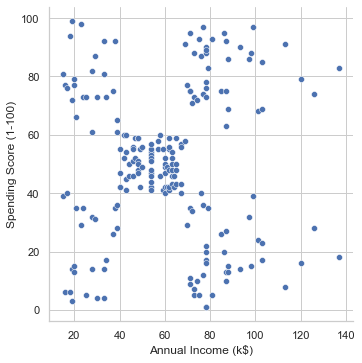

In [15]:
# understanding the relationship between annual income and spending score
#relationship plot

sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

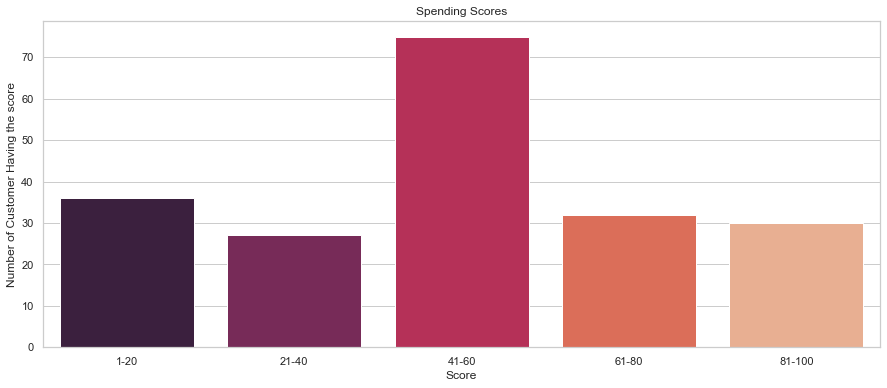

In [16]:
#dividing spending score into different categories
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]

ssx= ["1-20" , "21-40" , "41-60" , "61-80" ,"81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the score")

plt.show()



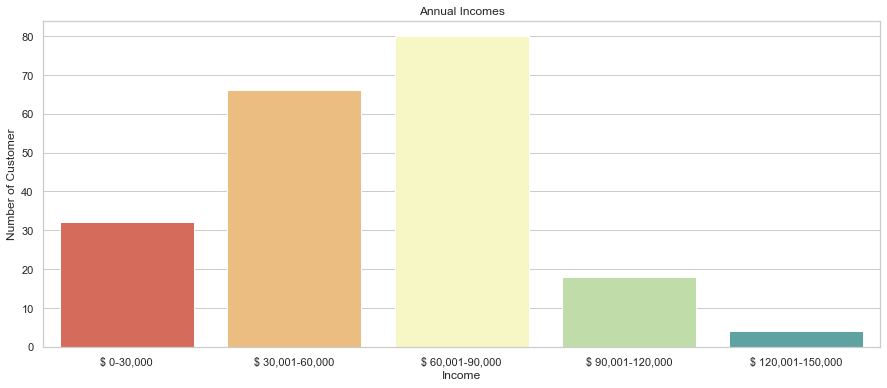

In [17]:
#analyzing annual income
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=0) & (df['Annual Income (k$)'] <=30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=31) & (df['Annual Income (k$)'] <=60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=61) & (df['Annual Income (k$)'] <=90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=91) & (df['Annual Income (k$)'] <=120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=121) & (df['Annual Income (k$)'] <=150)]

aix= ["$ 0-30,000" , "$ 30,001-60,000" ,"$ 60,001-90,000"  , "$ 90,001-120,000" ,"$ 120,001-150,000"]
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")

plt.show()

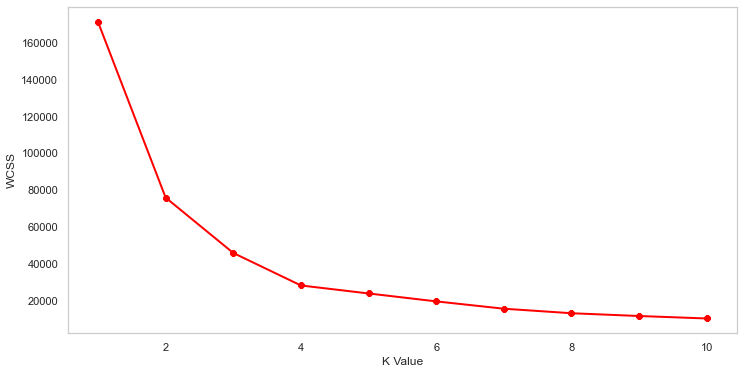

In [20]:
#clustering the data according to spending score and age
X1=df.loc[:,["Age","Spending Score (1-100)"]].values

#importing k means
from sklearn.cluster import KMeans

#finding optimum number of clusters that are best for our two variable - age & sscore
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#here we are using within cluster sum of squares method to understand optimum number of clusters we need

#the graph has sharp bend and is pretty constant after a certain value which is 4 so we are considering 4 as the optimal no of clustering

In [21]:
#here X1 is nothing but the age and spending score that we are including here
#using kmeans and 4 as the number of clusters

kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [22]:
#checking the centroids
##(x coordinate, y coordinate)

print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


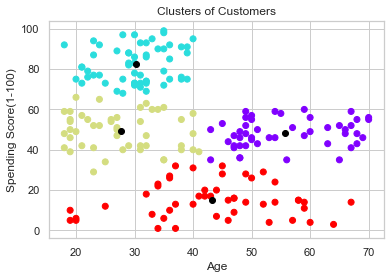

In [25]:
#visualizing clusters on a graph
#using scatter plot
#c stands for centroid

plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap="rainbow")     
#providing labels
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")         
#plotting cluster centers

#centres of the cluster are going to be represented in black color, while all the other points will be represented with different colors

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

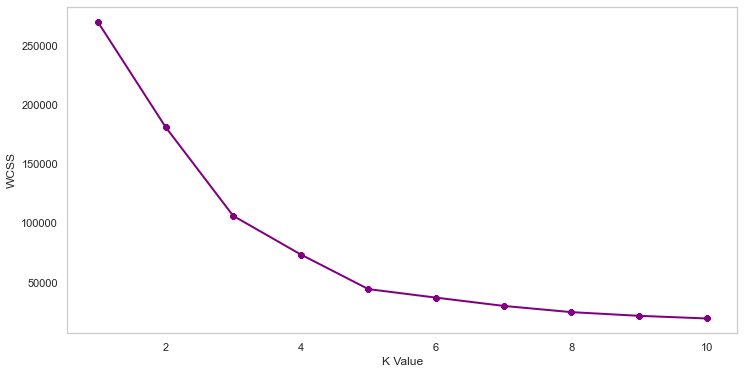

In [26]:
#clustering the data according to spending score and age
X2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

#importing k means
from sklearn.cluster import KMeans

#finding optimum number of clusters that are best for our two variable - ai & sscore
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="purple", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#here we are using within cluster sum of squares method to understand optimum number of clusters we need

#the graph has sharp bend and is pretty constant after a certain value which is around 5 so we are considering 5 as the optimal no of clustering

In [27]:
#here X2 is nothing but the annual income and spending score that we are including here
#using kmeans and 5 as the number of clusters

kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [28]:
#checking the centroids
##(x coordinate, y coordinate)

print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


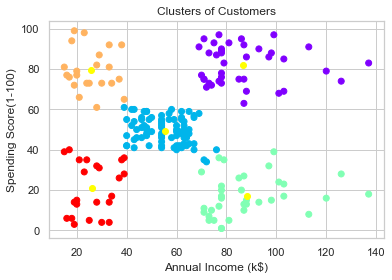

In [30]:
#visualizing clusters on a graph
#using scatter plot
#c stands for centroid

plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap="rainbow")     
#providing labels
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="yellow")         
#plotting cluster centers

#centres of the cluster are going to be represented in black color, while all the other points will be represented with different colors

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

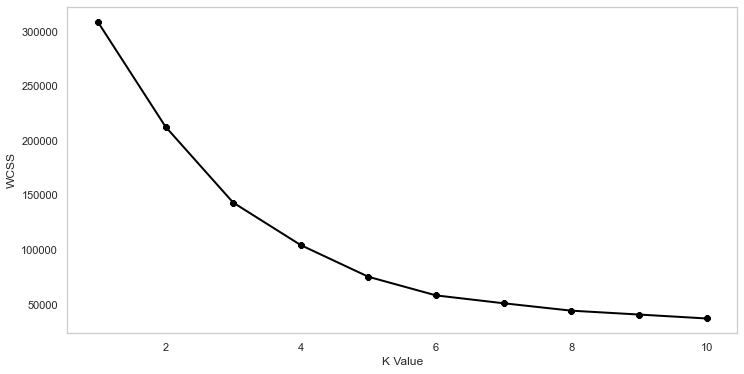

In [32]:
#considering all three variables together

X3=df.iloc[:,1:]
#this represents we want to includes columns starting from 1 till end

#finding optimum number of clusters that are best for our two variable - ai & sscore
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="black", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#here we are using within cluster sum of squares method to understand optimum number of clusters we need

#the graph has sharp bend and is pretty constant after a certain value which is around 5 so we are considering 5 as the optimal no of clustering


In [33]:
#here X3 is nothing but the age,annual income and spending score that we are including here
#using kmeans and 5 as the number of clusters

kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [34]:
#viewing centroids
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


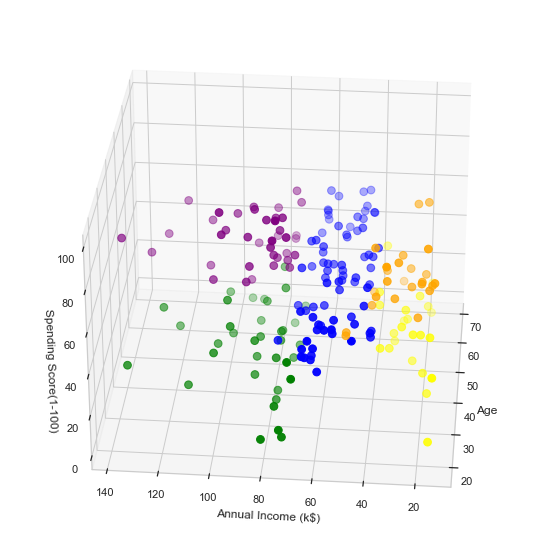

In [37]:
#in this case we are using 3 variables, we'll be using three axis and plotting a 3D graph

clusters = kmeans.fit_predict(X3)
df["label"] = clusters

#matplotlib
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))

ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue',s = 60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='orange',s = 60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='purple',s = 60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='yellow',s = 60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='green',s = 60)
ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score(1-100)')

plt.show()